In [1]:
"""
Title: AI539 - Machine Learning Challenge 2022 Winter Final Project
Authur: Yun-Yi Tseng
Date: 2022/03/13

This notebook used to analyze data

"""
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import os

plt.style.use("ggplot")
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/processed/air_quality_2018to2020.csv', index_col='time', parse_dates=True)

In [3]:
df.head()

,station,longitude,latitude,AMB_TEMP,CO,NO,NO2,NOx,O3,PM10,RAINFALL,RH,SO2,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,CH4,NMHC,THC,PM2.5
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,Sanyi,120.758833,24.382942,11.6,0.26,0.8,4.7,5.5,39.6,53,0,92,2.3,24,24,3.9,3.8,NaN,NaN,NaN,21
2018-01-01 01:00:00,Sanyi,120.758833,24.382942,11.6,0.28,0.9,2.3,3.2,40.1,47,0,93,0.5,24,23,3.7,3.8,NaN,NaN,NaN,22
2018-01-01 02:00:00,Sanyi,120.758833,24.382942,11.4,0.27,0.3,2.6,3,39.5,46,0,94,0.5,25,23,4.3,3.9,NaN,NaN,NaN,20
2018-01-01 03:00:00,Sanyi,120.758833,24.382942,11.2,0.26,0.3,2.6,2.9,39.5,46,0,95,0.5,24,21,3.4,3.6,NaN,NaN,NaN,22
2018-01-01 04:00:00,Sanyi,120.758833,24.382942,11.1,0.25,0.6,2.2,2.8,39.6,41,0,96,0.5,22,23,3.5,3.5,NaN,NaN,NaN,20


In [4]:
if not os.path.exists('../images'):
    os.makedirs('../images')

In [5]:
numerical_columns = ['longitude','latitude','AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx',
       'O3', 'PM10', 'PM2.5','RAINFALL', 'RH', 'SO2',
       'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR']

In [6]:
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col],errors='coerce')

In [7]:
# Data profile
df_profile = pd.DataFrame({})
for col in numerical_columns[:]:
    df_profile[col] = [
        df[col].min(),
        df[col].max(),
        df[col].mean(),
        df[col].median(),
        df[col].isna().sum(),
    ]
df_profile.set_index(pd.Index(["min", "max", "mean", "median", "missingness"]))

,longitude,latitude,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
min,118.312256,21.958069,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
max,121.792928,26.160469,66.400000,4.010000e+01,12.830000,8.980000e+00,306.500000,102.200000,430.600000,642.80000,14034.000000,1000.000000,113.200000,104.000000,152.900000,4.000000e+01,360.00000,990.000000,19.000000,702.400000
mean,120.845302,24.082229,24.242566,1.903698e+00,0.366926,1.458581e-01,3.849014,11.982384,15.814643,31.09666,36.288381,17.163015,0.217939,76.219633,2.394406,2.048909e+00,161.99822,162.539615,2.354152,2.012266
median,120.758833,24.162197,24.800000,1.890000e+00,0.310000,1.100000e-01,1.500000,9.800000,11.600000,28.80000,31.000000,14.000000,0.000000,78.000000,2.100000,2.000000e+00,149.00000,149.000000,1.900000,1.600000
missingness,0.000000,0.000000,39832.000000,1.044245e+06,53768.000000,1.044465e+06,67696.000000,65438.000000,65288.000000,84322.00000,51165.000000,47353.000000,19611.000000,57167.000000,47424.000000,1.044215e+06,114638.00000,70067.000000,70698.000000,114466.000000


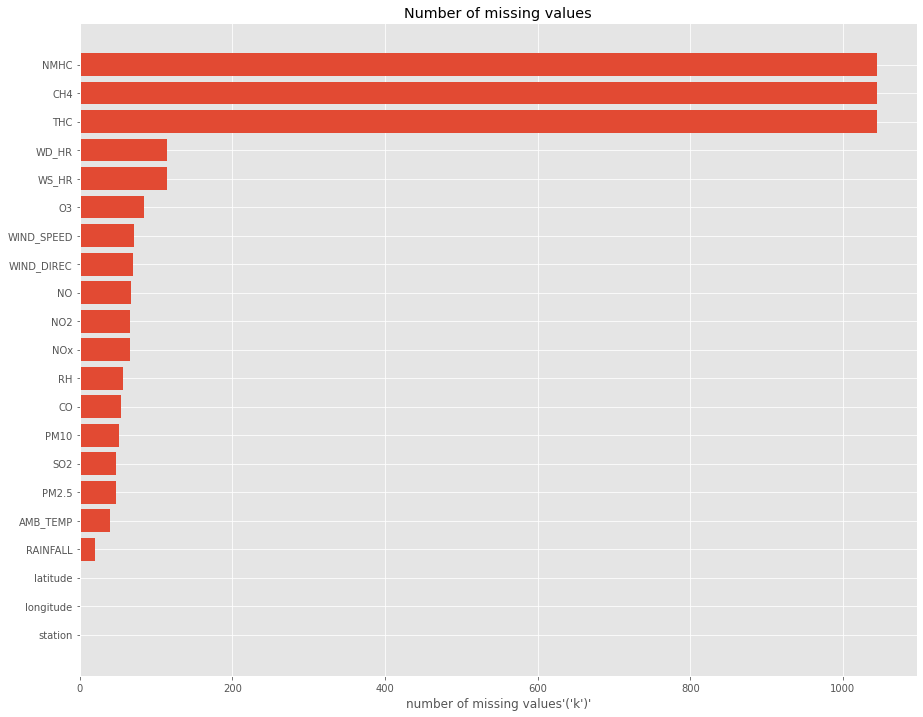

In [8]:
# Plot missing number values
fig, ax = plt.subplots(figsize=(15,12))
na_count = df.isna().sum().sort_values()/1000
ax.barh(list(na_count.index),list(na_count.values))
ax.set_title("Number of missing values")
ax.set_xlabel("number of missing values'('k')'")
fig.savefig('../images/missingness.png')

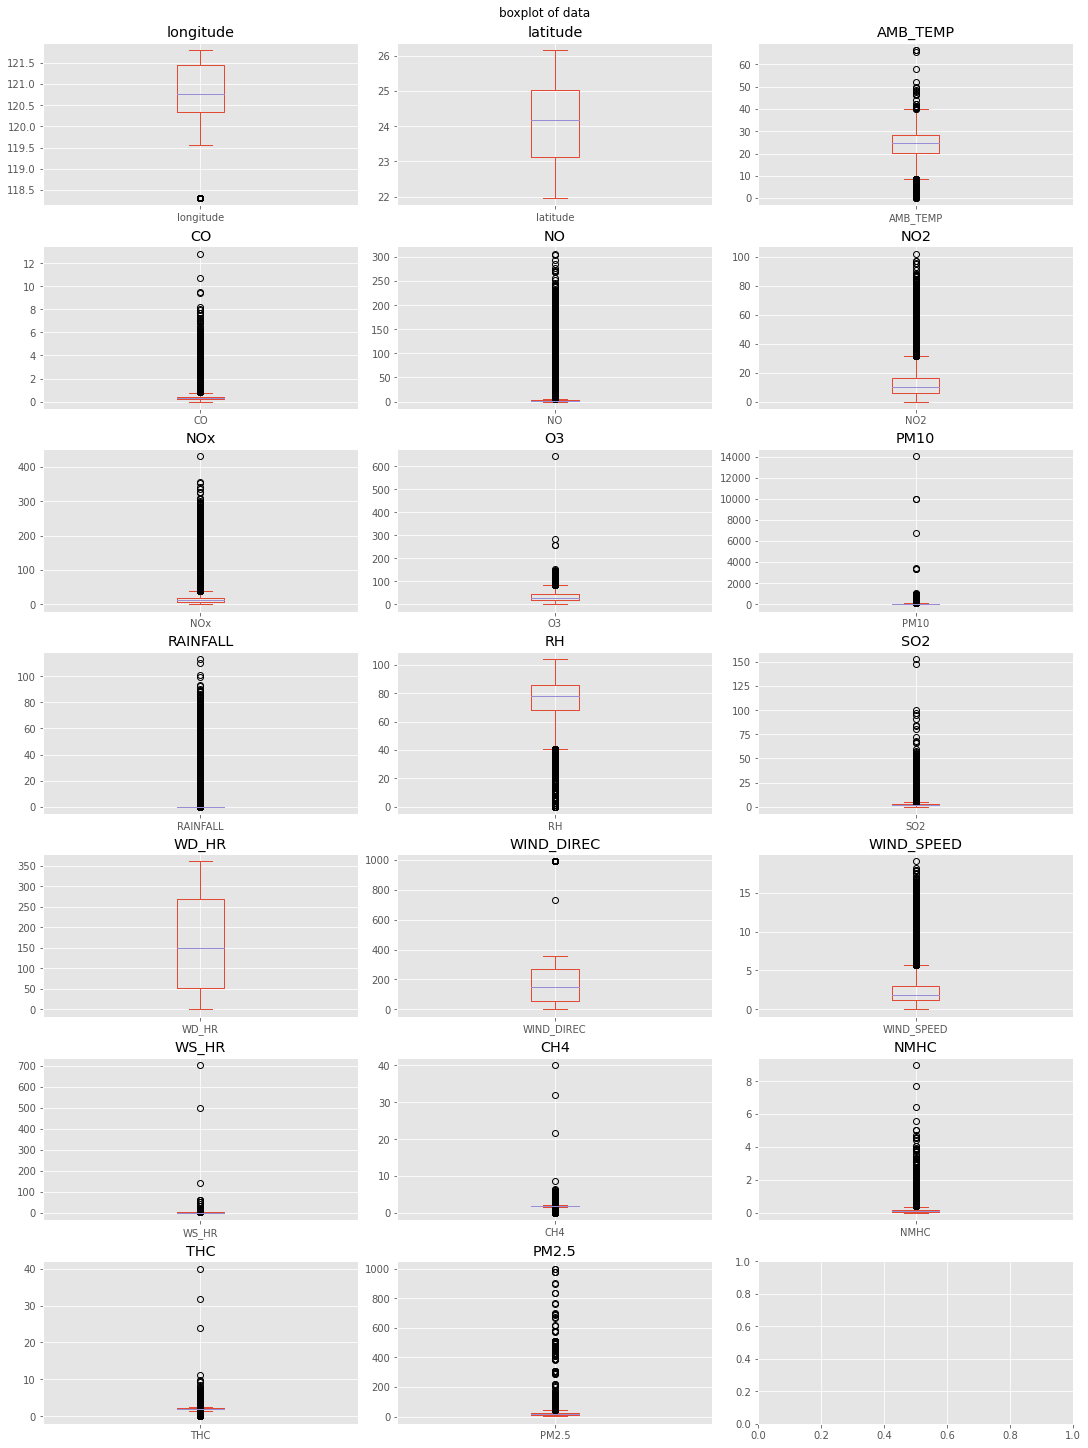

In [9]:
# plot boxplot
fig, ax = plt.subplots(7, 3, figsize=(15, 20), constrained_layout=True)
ax = ax.flatten()
for i, col in enumerate(df.drop(['station'],axis=1)):
    df[col].plot(kind="box", title=col, ax=ax[i])
    # sns.boxplot(data=df[col],ax=ax[i])
    # ax[i].set_title(col)
plt.suptitle("boxplot of data")
plt.savefig("../images/boxplot.png")

KeyboardInterrupt: 

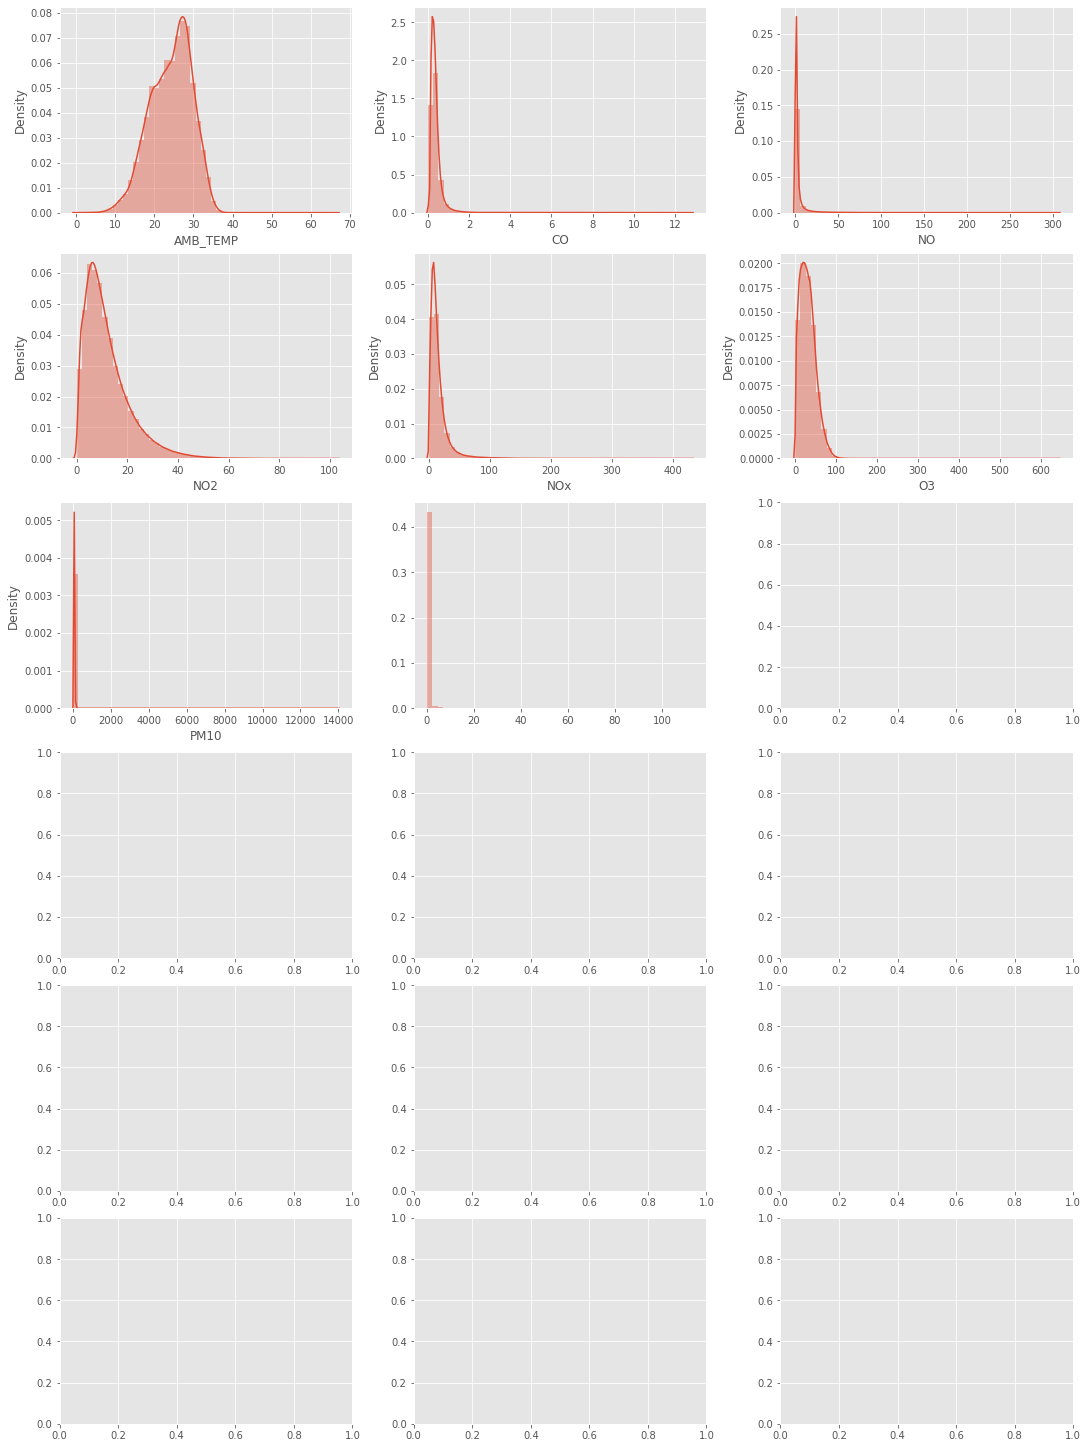

In [10]:
# plot histogram
fig, ax = plt.subplots(6, 3, figsize=(15, 20), constrained_layout=True)
ax = ax.flatten()
for i, col in enumerate(df.drop(['station','longitude','latitude'],axis=1)):
    sns.distplot(df[col], axlabel=col, ax=ax[i])
plt.suptitle("histogram of data")
plt.savefig("../images/hist.png")

In [ ]:
# helper function for plot data
def plot_target(start, end, station, ax):
    
    station_df = df.query("station == @station")
    window = station_df.loc[start:end,:]
    ax.set_title(station)
    ax.plot(window['PM2.5'])

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15,12))
axes = axes.flatten()
stations = np.random.choice(df['station'].unique(),9)
for i, station in enumerate(stations):
    plot_target('2018-1', '2018-1', station, axes[i])
fig.savefig('../images/samples.png')

In [ ]:
df['2018'].query("station == 'Xinying'")['PM2.5'].describe()

In [ ]:
# Plot Changhua station 
fig, axes = plt.subplots(3,figsize=(25,8), sharey=True, constrained_layout=True)
fig.suptitle('Changhua station', fontsize=16)
axes[0].plot(df['2018'].query("station=='Changhua'")['PM2.5'])
axes[1].plot(df['2019'].query("station=='Changhua'")['PM2.5'])
axes[2].plot(df['2020'].query("station=='Changhua'")['PM2.5'])
fig.savefig('../images/changhua.png')

In [ ]:
# The extreme value only happend in a hour
df[(df['PM2.5']>=300) & (df['station'] == 'Changhua')]

In [ ]:
# Also the extreme value of Sanyi
fig, ax = plt.subplots(figsize=(25,8))
ax.plot(df['2018-01':'2018-02'].query("station=='Sanyi'")['PM2.5'])

In [ ]:
# This station doen't have suddendly peak
fig, axes = plt.subplots(3,figsize=(25,8), sharey=True, constrained_layout=True)
fig.suptitle('Yonghe station', fontsize=16)
axes[0].plot(df['2018'].query("station=='Yonghe'")['PM2.5'])
axes[1].plot(df['2019'].query("station=='Yonghe'")['PM2.5'])
axes[2].plot(df['2020'].query("station=='Yonghe'")['PM2.5'])

In [ ]:
# The suddendly peak happend at 2018-05
fig, axes = plt.subplots(3,figsize=(25,8), sharey=True, constrained_layout=True)
fig.suptitle('Songshan station', fontsize=16)
axes[0].plot(df['2018'].query("station=='Songshan'")['PM2.5'])
axes[1].plot(df['2019'].query("station=='Songshan'")['PM2.5'])
axes[2].plot(df['2020'].query("station=='Songshan'")['PM2.5'])

In [ ]:
# Top 20 values of PM2.5.
df['PM2.5'].sort_values(ascending=False)[:20]

In [ ]:
# plot histogram
fig, ax = plt.subplots(figsize=(12, 15), constrained_layout=True)

sns.distplot(df.query('RAINFALL > 0')['RAINFALL'], ax=ax)
plt.suptitle("histogram of RIANFALL that rains")


In [ ]:
# plot boxplot
fig, ax = plt.subplots(figsize=(15, 12), constrained_layout=True)
df.query('RAINFALL>0')['RAINFALL'].plot(kind="box", title='RAINFALL > 0', ax=ax)